In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

## Manual implementation of a Single-Variate Linear Regression

In [4]:
# y = a + bx + epsilon
# a = 1, b = 2

# Data Generation
X = np.random.rand(100, 1)
Y = 1 + 2 * X + .1 * np.random.randn(100, 1)

# Split the dataset
idxs = np.arange(100)
np.random.shuffle(idxs)
train_idx = idxs[:80] # 80-20 split
val_idx = idxs[80:]

X_train, Y_train = X[train_idx], Y[train_idx]
X_val, Y_val = X[val_idx], Y[val_idx]

In [23]:
# Training:

# Random starting values
a = np.random.randn(1)
b = np.random.randn(1)

lr = 1e-1 # Learning Rate
epochs = 300 # Number of Epochs

losses = list()

for epoch in range(epochs): # Batch Learning
    # Predicted output for all inputs
    Y_hat = a + b * X_train

    error = (Y_train - Y_hat)
    loss = (error ** 2).mean()
    losses.append(loss)

    # Compute partial derivatives (by hand)
    grad_a = -2 * error.mean()
    grad_b = -2 * (X_train * error).mean()

    # Update params by descending the gradients
    a = a - lr * grad_a
    b = b - lr * grad_b

print(f"Final params: a={a}, b={b}")

Final params: a=[0.97147225], b=[2.06425174]


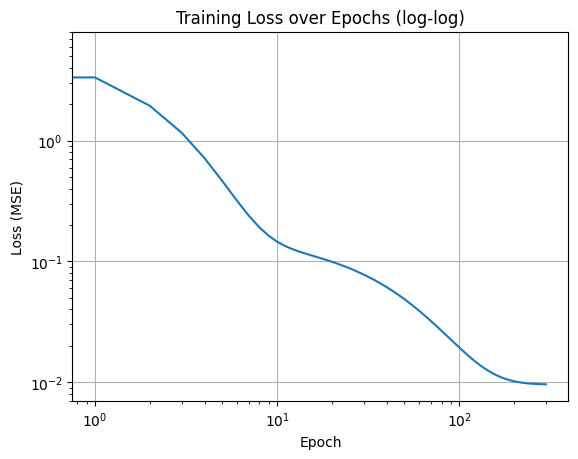

In [24]:
plt.loglog(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs (log-log)")
plt.grid(True)
plt.show()

## PyTorch implementation of Linear Regression

In [25]:
device = 'cuda' if torch.cuda_is_available() else 'cpu'

# Convert into PyTorch Tensors
X_train_tensor = torch.from_numpy(X_train).float().to(device)
Y_train_tensor = torch.from_numpy(Y_train).float().to(device)

print(type(X_train), type(X_train_tensor), X_train_tensor.type())

NameError: name 'torch' is not defined

In [ ]:
# Training:

# Random starting values (sent to device)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

lr = 1e-1 # Learning Rate
epochs = 300 # Number of Epochs

losses = list()

# The Stochastic Gradient Descent Optimizer knows how to update a and b automatically
optimizer = optim.SGD([a, b], lr=lr)

# The Mean Squared Error Loss function knows how to compute the loss automatically
loss_function = nn.MSELoss(reduction='mean')

for epoch in range(epochs): # Batch Learning
    # Predicted output for all inputs
    Y_hat = a + b * X_train_tensor

    loss = loss_function(Y_train_tensor, Y_hat)
    losses.append(loss)

    # Compute partial derivatives
    loss.backwards()

    # Update params (using the optimizer)
    optimizer.step()

    optimizer.zero_grad()

print(f"Final params: a={a}, b={b}")